In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
path = "../data/raw/Genre classification dataset/train_data.txt"
df = pd.read_csv(path, delimiter=':::', names=['name', 'title', 'description'], engine='python')
df.title = df.title.apply(lambda x: x.strip())
df

,name,title,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [3]:
codes, uniques = pd.factorize(df["title"])
uniques

Index(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'],
      dtype='object')

In [4]:
genre_id, uniques = pd.factorize(df.title)
df["genre_id"] = genre_id
labels = df.genre_id.tolist()

In [5]:
counts = df.title.value_counts()
counts


title
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64

/var/folders/43/vz069bt969977j9ymstxq4gw0000gn/T/ipykernel_53088/1871132958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dfc.values, y=dfc.index, palette='viridis')


<Axes: ylabel='title'>

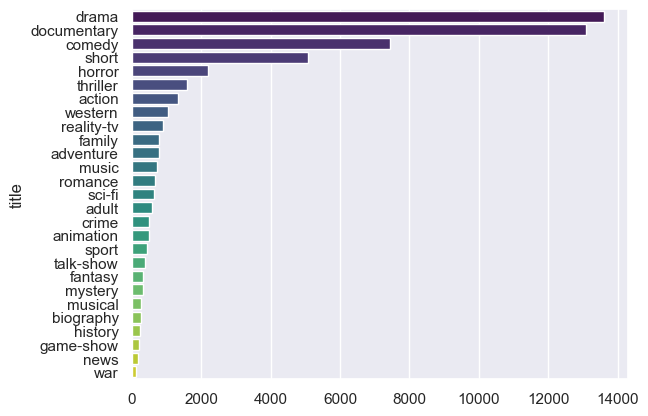

In [6]:
dfc = df.groupby('title')['title'].count().sort_values(axis=0, ascending=False)
sns.barplot(x=dfc.values, y=dfc.index, palette='viridis')

In [7]:
df.groupby("title")["title"].count().quantile(0.5)

647.0

In [8]:
df.groupby("title")['title'].count().sort_values()

title
war              132
news             181
game-show        194
history          243
biography        265
musical          277
mystery          319
fantasy          323
talk-show        391
sport            432
animation        498
crime            505
adult            590
sci-fi           647
romance          672
music            731
adventure        775
family           784
reality-tv       884
western         1032
action          1315
thriller        1591
horror          2204
short           5073
comedy          7447
documentary    13096
drama          13613
Name: title, dtype: int64

/var/folders/43/vz069bt969977j9ymstxq4gw0000gn/T/ipykernel_53088/3250596855.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_len.values, y=avg_len.index, ax=ax, palette='viridis')


Text(0.5, 1.0, 'average length of a description')

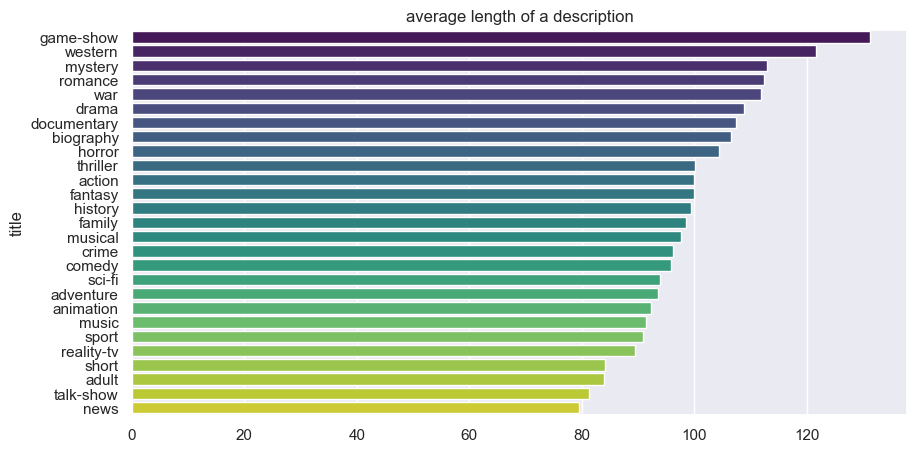

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
df['length'] = df.description.apply(lambda x: len(x.split()))
avg_len = df.groupby('title')['length'].mean().sort_values(axis=0, ascending=False)

sns.barplot(x=avg_len.values, y=avg_len.index, ax=ax, palette='viridis')
ax.set_title('average length of a description')

In [19]:
test_path = "../data/raw/Genre classification dataset/test_data.txt"
df_test = pd.read_csv(test_path, delimiter=':::', names=['name', 'description'], engine='python')


In [20]:
df_test

,name,description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."
